<!--![wsu_branding.jpg](wsu_branding.jpg)-->

<img src="other_lecture/wsu_branding.jpg" width="650" height="650" />


<!--
# Why Brian2
* Sparse
* can be converted to fast cpp CUDA code and run on Nvidia Nano.
-->

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/russelljjarvis/LIF_DE_Brian2/blob/main/Brian2DiffEquations.ipynb)


# Assumed Knowledge (Pre-requisites)

* Phospholipid membrane bilayer
* Ionic basis of the membrane potential
* Programming with Python MATLAB or any procedural language.

# Contents 

### In this tutorial we will.

- Big picture Biology Overview of electrical excitability and trees.
    -  Electrical Signalling in Biology (trees, sea sponges, venus fly trap).
    -  Modelling issues: Reduction versus mimicry
    -  Motivation for reduced neuron models the LIF neuron.
- Solve the LIF neuron with Brian2
- Solve the LIF neuron with forward Euler and numba
- Compare models with experimental data.
- Show how the LIF model is a bad fit for biological data.
    - Better fits: Izhikevich and Adaptive Exponential Integrate and fire model.



# Other Materials:
 
* [Book (free online version) Chapter 2 only](https://neuronaldynamics.epfl.ch/online/index.html)

* [Exercises based on the book](https://neuronaldynamics-exercises.readthedocs.io/en/latest/)

* [Tutorials](https://github.com/brian-team/brian2/tree/master/tutorials)
 
* [Slides only (not the code, or code exercises](https://compneuro.neuromatch.io/tutorials/W2D3_BiologicalNeuronModels/student/W2D3_Tutorial1.html)
 





## Electrically Excitable cell membranes are common in Natural world 

* Plant cells can be electrically excitable too (for example the venus fly trap).
* Spermatoza.
* Pumpkin seeds

Reasons include fast behavior, and rapid signalling to other cells.

# Venus Fly Trap

* A plant that can trap flies by moving surprisingly fast (no skeletal muscles or motor neurons).


<img src="other_lecture/venus_flytrap_aps.jpg"  width="350" height="350" />



[Source](https://www.linkedin.com/in/ACoAAALn2tsB8Yx7K21oU-RUKtRWSjXLrXLeaDA/)

# Brain Evolution

## Synapses (chemical connnections between cells) may have evolved from very basic organisms


<img src="other_lecture/recropped_b_evo.png"  width="350" height="350" />

* Such as sea sponges

<img src="other_lecture/seasponge2.png"  width="350" height="350" />


# Trees Shapes are common in Biology.
* Nature uses trees to solve the problem of transporting information and nutrients in a volume at low metabolic cost.

* A large surface to volume ratio facilitates low cost transport.

* We don't have to model the neuronal shape (a tree) to make realistic neuronal simulations




<img src="other_lecture/trees5.png" width="650" height="650"/>




Tree roots may share nutrients and exchange information via fungal mycelium.

<img src="other_lecture/rhizozome2.png"  width="450" height="450" />

In the brain cell proteins are "walked" from rhibosomes (protein factories) along axons to their target destination at axon boutans using "axonal-transport".

Trees sample many points in a large volume, while occupying little volume themselves.

<!--![](tree3.png)
width="150" height="150" />

-->





# But we don't need the tree to do acceptably realistic simulations of neurons.

* Electrically simulating the whole tree might be bio-mimicry.

* GLIF neurons can be more accurate than Multicompartment neurons

# Biological cells Have Spatially Extended 3D form

<img src="other_lecture/reduction_to_lif2.png" width="450" height="450" />

# Many reduced neuronal models have no spatial dimensions.

* Depicted as a point, conceptually a point.

<img src="other_lecture/comparison_tree_LIF2.png" width="450" height="450" />



# Revision
## Recall ...


<img src="other_lecture/Slide10.jpg" width="450" height="450" />



# Revision
## Recall ...


<img src="other_lecture/Slide14.jpg" width="450" height="450" />



# Digital Simulation as an biological lab test bench

<p>
    <img src="other_lecture/virtual_experiment.png" width="450" height="450" />
</p>


On the time-grid of of stepsize $\Delta t$, the dynamics of Eqn. (1) is discretized to be 

\begin{eqnarray}
\tau_m \frac{\Delta V_n}{\Delta t} &=& -(V_n-V_L) +\frac{I_n}{g_L},
\end{eqnarray}

where $V_n = V(n\Delta t)$, and $I_n=I(n\Delta t)$. 

Then the updating process of $V_{n+1}$ at time $t_{n+1}=(n+1)\Delta t$ based on $V_{n}$ can be formed as 

\begin{eqnarray}
V_{n+1} &=& V_n+ \Delta V_n \\
\Delta V_n &=&  \left(-(V_n-V_L) +\frac{I}{g_L}\right)\frac{\Delta t}{\tau_m} \qquad (2)
\end{eqnarray}


<div class="column"></div>
<img src="other_lecture/digital_implementation.png" width="350" height="350" />



# Installs for Collab

In [1]:
!pip install pandas -q
!pip install brian2 -q
!pip install plotly -q
!pip install ipywidgets -q


In [2]:
!git clone https://github.com/DiGyt/neuropynamics/ -q


fatal: destination path 'neuropynamics' already exists and is not an empty directory.


# Interactive Code

In [3]:
from brian2 import *
import plotly
from brian2 import NeuronGroup, SpikeMonitor, StateMonitor, run
from brian2.units import ms
import plotly.express as px
import pandas as pd
#from ipywidgets import Button, Layout
#import ipywidgets as widgets
#%matplotlib inline
import matplotlib.pyplot as plt
#import seaborn as sns

# Main packages
import numpy as np
# Brian2 package
# Unit definitions
from brian2 import mV, ms, volt, second, umetre, ufarad, siemens, cm, msiemens, amp, uA, nA
# Other stuff
from brian2 import start_scope, NeuronGroup, StateMonitor, SpikeMonitor, run
# Plotting stuff
from neuropynamics.src.utils.plotting import plot_single_neuron
# Interactive widgets


import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, HBox, VBox, Layout
# Set button layout
button_layout = Layout(width='180px', height='30px')

# Set slider config
slider_total_width = '800px'
slider_desc_width = '200px'


#from IPython.display import Javascript
#try:
#    display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'''))
#except:
#    pass




# Perfect Integrator


* The perfect Integrator is a stepping stone to understanding the **Leaky Integrate and Fire** model.



## Insert Perfect Integrator Equations below.

# Leaky Integrate and Fire model

<!---
![](water_analogy.png)
-->

# First we will simulate a LIF neuron 
the easy way using Brian2, so we know we have something to compare with


https://brian2.readthedocs.io/en/stable/introduction/brian1_to_2/library.html


# Code approach borrowed from here:

https://colab.research.google.com/github/DiGyt/neuropynamics/blob/master/notebooks/Single_neurons.ipynb#scrollTo=-BMn7Gi5EWGn

In [4]:
N = 1

In [5]:

def create_lif_neuron(v_max):
    """Creates a brian2 NeuronGroup that contains a single leaky integrate-and-fire neuron"""
    # Define differential equation for leaky integrate-and-fire neuron
    eqs = '''   
        dv/dt = ((El - v) + I)/tau : volt
        
        I : volt
        '''
    # Define reset function
    reset = 'v = {}*mV'.format(v_max-20)
    # Define threshold
    threshold = 'v > {}*mV'.format(v_max)
    # Return NeuronGroup object
    return NeuronGroup(1, eqs, threshold = threshold, reset = reset, method = 'euler')

def reset_lif(name):
    I_ext_slider.value = I_ext_def
    tau_slider.value = tau_def
    e_leak_slider.value = e_leak_def

# Create function that creates a neuron and plots its behavior based on the given parameters
def create_and_plot_lif_neuron(I_ext, tau, e_leak, v_max):
    # Start the scope for the brian2 toolbox to register all neurons that are created
    start_scope()
    # Define the neuron
    neuron = create_lif_neuron(v_max)      
    # Set neuron parameters
    tau = tau*ms;
    El = -e_leak*mV
    # Start monitoring the neurons state
    statemon = StateMonitor(source = neuron, variables = ['v', 'I'], record = 0)
    # Start monitoring spiking behavior
    spikemon = SpikeMonitor(source = neuron, variables= 'v')
    # Run neuron simulation for 100ms without input
    run(100*ms)
    # Set input current to neuron
    neuron.I = I_ext * mV
    # Run 500ms with input
    run(500*ms)
    # Remove input current to neuron
    neuron.I = 0 * mV
    # Run neuron simulation for 100ms without input
    run(100*ms)
    # Plot results
    plot_single_neuron(x = statemon.t/ms, neuron_data = [statemon.v[0]/mV], neuron_labels = ['Membrane Potential'], neuron_colors = ['steelblue'], \
                     spikes = spikemon.t/ms, spike_color = 'red', \
                     input_current = statemon.I[0]/mV, input_label = 'Input Current', input_color = 'gold', \
                     y_range = [-90,0], title = 'Leaky Integrate-and-Fire Neuron', x_axis_label = 'Time (ms)', y_axis_label = 'Membrane Potential', input_axis_label = 'Input Current', hline = v_max)
  


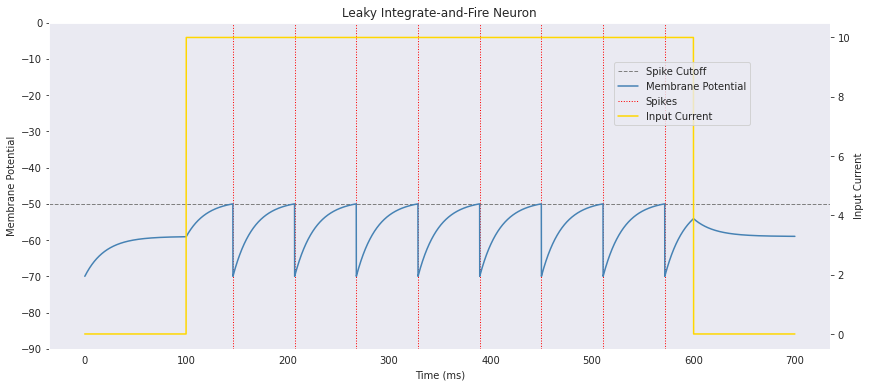

In [6]:
# Set default parameters 
I_ext_def = 10.
tau_def = 20.
e_leak_def = 59.

# Create sliders for neuron parameters
tau_slider = widgets.FloatSlider(value = tau_def, min = 1., max = 30., step = 1, description = 'Charging modulation tau:', readout_format = '.1f', continuous_update = False, layout = {'width': slider_total_width}, style = {'description_width': slider_desc_width})
e_leak_slider = widgets.FloatSlider(value = e_leak_def, min = 0., max = 85., step = 1, description = 'Leakage E_leak:', readout_format = '.1f', continuous_update = False, layout = {'width': slider_total_width}, style = {'description_width': slider_desc_width}) 

# Create slider for input current
I_ext_slider = widgets.FloatSlider(value = I_ext_def, min = 0., max = 40., step = 1, description = 'Input current I:', readout_format = '.1f', continuous_update = False, layout = {'width': slider_total_width}, style = {'description_width': slider_desc_width})

# Make interactive widget for function above with the given sliders
main_widgets = interactive(create_and_plot_lif_neuron, I_ext = I_ext_slider, tau = tau_slider, e_leak = e_leak_slider, v_max = fixed(-50))


# Reset button
reset_button = widgets.Button(description='Reset', layout = button_layout)
reset_button.on_click(reset_lif)

# Display main widgets and reset button
display(VBox(children=[reset_button, main_widgets]))

In [7]:

def get_step_current(t_start, t_end, unit_time, amplitude, append_zero=True):

    """Creates a step current. If t_start == t_end, then a single
    entry in the values array is set to amplitude.
    Args:
        t_start (int): start of the step
        t_end (int): end of the step
        unit_time (Brian2 unit): unit of t_start and t_end. e.g. 0.1*brian2.ms
        amplitude (Quantity): amplitude of the step. e.g. 3.5*brian2.uamp
    Returns: TimedArray: Brian2.TimedArray
    """

    assert isinstance(t_start, int), "t_start_ms must be of type int"
    assert isinstance(t_end, int), "t_end must be of type int"
    assert b2.units.fundamentalunits.have_same_dimensions(amplitude, b2.amp), \
        "amplitude must have the dimension of current e.g. brian2.uamp"
    tmp_size = 1 + t_end  # +1 for t=0
    if append_zero:
        tmp_size += 1
    tmp = np.zeros((tmp_size, 1)) * b2.amp
    tmp[t_start: t_end + 1, 0] = amplitude
    curr = b2.TimedArray(tmp, dt=1. * unit_time)
    return curr

In [8]:
# same input for all neurons
"""
start_scope()
#I = TimedArray(linspace(10*nS, 10*nS, 10),dt=1*ms)

#I = TimedArray(np.hstack([[c, c, c, 0, 0]
#                                 for c in np.random.rand(1000)]),
#                                dt=10*ms)


from brian2 import amp
t_start = 100
t_end = 1000
tmp_size = 1 + t_end  # +1 for t=0
#if append_zero:
#    tmp_size += 1
tmp = np.zeros((tmp_size, 1)) * amp
tmp[t_start: t_end + 1, 0] = 20  * amp
I = TimedArray(tmp, dt=1. * ms)
#I = TimedArray(linspace(0*mV, 30*mV, 1000),
#               dt=1*ms)

"""
#eqs = '''
#      dv/dt = (I(t) - v)/tau : volt
#      '''

#eqs = """
#    dv/dt = ((El - v) + I(t))/tau : volt (unless refractory)
#    I : amp
#    """


#I = TimedArray(linspace(10*nS, 10*nS, 10),dt=1*ms)
#eqs = '''dv/dt = ((El - v) + I(t)

#eqs = '''dvm/dt = (gL*(EL-vm)+gL*DeltaT*exp((vm-VT)/DeltaT) -w + I)/C : volt
#         dw/dt=(a*(vm-EL)-w)/tauw : amp
#         I : amp'''
"""
neuron = NeuronGroup(1, model=eqs,
                    reset='v = 0*mV',
                    threshold='v > 15*mV')


# monitoring membrane potential of neuron and injecting current
state_monitor = StateMonitor(neuron, ["v"], record=True)
spike_monitor = SpikeMonitor(neuron)
# run the simulation
run(1000* ms)

df = pd.DataFrame({'v':statemon.v[0],'t':statemon.t/ms})

fig = px.line(df, x="t", y="v")
fig.show()

"""

'\nneuron = NeuronGroup(1, model=eqs,\n                    reset=\'v = 0*mV\',\n                    threshold=\'v > 15*mV\')\n\n\n# monitoring membrane potential of neuron and injecting current\nstate_monitor = StateMonitor(neuron, ["v"], record=True)\nspike_monitor = SpikeMonitor(neuron)\n# run the simulation\nrun(1000* ms)\n\ndf = pd.DataFrame({\'v\':statemon.v[0],\'t\':statemon.t/ms})\n\nfig = px.line(df, x="t", y="v")\nfig.show()\n\n'

In [9]:
"""
start_scope()

import brian2 as b2
#t_start = 10#* b2.ms
#t_end = 100#* b2.ms
#amplitude=10
#input_current = get_step_current(t_start, t_end, 1 * b2.ms, amplitude *b2.pA)

#eqs = """
#    dv/dt =
#    ( -(v-v_rest) + membrane_resistance * input_current(t) ) / membrane_time_scale : volt (unless refractory)"""#


#I = TimedArray(linspace(10*nS, 10*nS, 10),dt=1*ms)
#eqs = '''dv/dt = ((El - v) + I(t)
#
#eqs = '''dvm/dt = (gL*(EL-vm)+gL*DeltaT*exp((vm-VT)/DeltaT) -w + I)/C : volt
#         dw/dt=(a*(vm-EL)-w)/tauw : amp
#         I : amp'''
"""
v_rest=-65

# LIF neuron using Brian2 library
neuron = b2.NeuronGroup(
    1, model=eqs, reset="v=v_reset", threshold="v>firing_threshold",refractory=10, method="linear")
#neuron.v = v_rest  # set initial value

# monitoring membrane potential of neuron and injecting current
state_monitor = b2.StateMonitor(neuron, ["v"], record=True)
spike_monitor = b2.SpikeMonitor(neuron)
# run the simulation
run(1000* ms)
"""


'\nv_rest=-65\n\n# LIF neuron using Brian2 library\nneuron = b2.NeuronGroup(\n    1, model=eqs, reset="v=v_reset", threshold="v>firing_threshold",refractory=10, method="linear")\n#neuron.v = v_rest  # set initial value\n\n# monitoring membrane potential of neuron and injecting current\nstate_monitor = b2.StateMonitor(neuron, ["v"], record=True)\nspike_monitor = b2.SpikeMonitor(neuron)\n# run the simulation\nrun(1000* ms)\n'

In [10]:
"""
start_scope()
import brian2 as b2

tau = 10*ms; El = -70*mV

I = TimedArray(linspace(0*b2.mV, 20*b2.mV, 100),
               dt=10*b2.ms)
#eqs = '''dv/dt = ((El - v) + I(t))/tau : volt
#         I : volt
#
#'''


group = NeuronGroup(1, eqs,
                    threshold='v > -50*mV',
                    reset='v = -70*mV', refractory=5*ms, method='exact')

statemon = StateMonitor(group,  'v', record=0)
spikemon = SpikeMonitor(group)

run(100*ms)

df = pd.DataFrame({'v':statemon.v[0],'t':statemon.t/ms})

fig = px.line(df, x="t", y="v")
fig.show()
"""

'\nstart_scope()\nimport brian2 as b2\n\ntau = 10*ms; El = -70*mV\n\nI = TimedArray(linspace(0*b2.mV, 20*b2.mV, 100),\n               dt=10*b2.ms)\n#eqs = \'\'\'dv/dt = ((El - v) + I(t))/tau : volt\n#         I : volt\n#\n#\'\'\'\n\n\ngroup = NeuronGroup(1, eqs,\n                    threshold=\'v > -50*mV\',\n                    reset=\'v = -70*mV\', refractory=5*ms, method=\'exact\')\n\nstatemon = StateMonitor(group,  \'v\', record=0)\nspikemon = SpikeMonitor(group)\n\nrun(100*ms)\n\ndf = pd.DataFrame({\'v\':statemon.v[0],\'t\':statemon.t/ms})\n\nfig = px.line(df, x="t", y="v")\nfig.show()\n'

In [11]:
"""
start_scope()

C = 1*nF; gL = 30*nS; EL = -70*mV; VT = -50*mV; DeltaT = 2*mV
eqs = '''dvm/dt = (gL*(EL-vm)+gL*DeltaT*exp((vm-VT)/DeltaT) + I)/C : volt
         I : amp'''
group = NeuronGroup(N, eqs,
                    threshold='v > -50*mV',
                    reset='v = -70*mV')

statemon = StateMonitor(group, 'v', record=0)
spikemon = SpikeMonitor(group)

run(150*ms)

df = pd.DataFrame({'v':statemon.v[0],'t':statemon.t/ms})

fig = px.line(df, x="t", y="v")
fig.show()
"""

'\nstart_scope()\n\nC = 1*nF; gL = 30*nS; EL = -70*mV; VT = -50*mV; DeltaT = 2*mV\neqs = \'\'\'dvm/dt = (gL*(EL-vm)+gL*DeltaT*exp((vm-VT)/DeltaT) + I)/C : volt\n         I : amp\'\'\'\ngroup = NeuronGroup(N, eqs,\n                    threshold=\'v > -50*mV\',\n                    reset=\'v = -70*mV\')\n\nstatemon = StateMonitor(group, \'v\', record=0)\nspikemon = SpikeMonitor(group)\n\nrun(150*ms)\n\ndf = pd.DataFrame({\'v\':statemon.v[0],\'t\':statemon.t/ms})\n\nfig = px.line(df, x="t", y="v")\nfig.show()\n'

In [12]:
"""
start_scope()

C = 1*nF; gL = 30*nS; EL = -70*mV; VT = -50*mV; DeltaT = 2*mV; tauw = 150*ms; a = 4*nS
I = TimedArray(linspace(10*nS, 10*nS, 10),dt=1*ms)
#eqs = '''dv/dt = ((El - v) + I(t)

eqs = '''dvm/dt = (gL*(EL-vm)+gL*DeltaT*exp((vm-VT)/DeltaT) -w + I)/C : volt
         dw/dt=(a*(vm-EL)-w)/tauw : amp
         I : amp'''
group = NeuronGroup(N, eqs,
                    threshold='vm > -20*mV',
                    reset='vm=-70*mV; w += 0.08*nA')

statemon = StateMonitor(group, 'vm', record=0)
spikemon = SpikeMonitor(group)

run(150*ms)

df = pd.DataFrame({'v':statemon.vm[0],'t':statemon.t/ms})

fig = px.line(df, x="t", y="v")
fig.show()
"""

'\nstart_scope()\n\nC = 1*nF; gL = 30*nS; EL = -70*mV; VT = -50*mV; DeltaT = 2*mV; tauw = 150*ms; a = 4*nS\nI = TimedArray(linspace(10*nS, 10*nS, 10),dt=1*ms)\n#eqs = \'\'\'dv/dt = ((El - v) + I(t)\n\neqs = \'\'\'dvm/dt = (gL*(EL-vm)+gL*DeltaT*exp((vm-VT)/DeltaT) -w + I)/C : volt\n         dw/dt=(a*(vm-EL)-w)/tauw : amp\n         I : amp\'\'\'\ngroup = NeuronGroup(N, eqs,\n                    threshold=\'vm > -20*mV\',\n                    reset=\'vm=-70*mV; w += 0.08*nA\')\n\nstatemon = StateMonitor(group, \'vm\', record=0)\nspikemon = SpikeMonitor(group)\n\nrun(150*ms)\n\ndf = pd.DataFrame({\'v\':statemon.vm[0],\'t\':statemon.t/ms})\n\nfig = px.line(df, x="t", y="v")\nfig.show()\n'

In [13]:
#import numba
#@numba.jit
def run_LIF(pars, Iinj, stop=False):
  """
  Simulate the LIF dynamics with external input current

  Args:
    pars       : parameter dictionary
    Iinj       : input current [pA]. The injected current here can be a value
                 or an array
    stop       : boolean. If True, use a current pulse

  Returns:
    rec_v      : membrane potential
    rec_sp     : spike times
  """

  # Set parameters
  V_th, V_reset = pars['V_th'], pars['V_reset']
  tau_m, g_L = pars['tau_m'], pars['g_L']
  V_init, E_L = pars['V_init'], pars['E_L']
  dt, range_t = pars['dt'], pars['range_t']
  Lt = range_t.size
  tref = pars['tref']

  # Initialize voltage
  v = np.zeros(Lt)
  v[0] = V_init

  # Set current time course
  Iinj = Iinj * np.ones(Lt)

  # If current pulse, set beginning and end to 0
  if stop:
    Iinj[:int(len(Iinj) / 2) - 1000] = 0
    Iinj[int(len(Iinj) / 2) + 1000:] = 0
  #print(Iinj)
  # Loop over time
  rec_spikes = []  # record spike times
  tr = 0.  # the count for refractory duration
  #times = [it for it in range(Lt - 2)]
  for it in range(Lt - 2):


    if tr > 0:  # check if in refractory period
      v[it] = V_reset  # set voltage to reset
      tr = tr - 1 # reduce running counter of refractory period
    elif v[it] >= V_th:  # if voltage over threshold
      rec_spikes.append(it)  # record spike event
      v[it] = V_reset  # reset voltage

      tr = tref / dt  # set refractory time
    # Calculate the increment of the membrane potential
    #dv = (-(v[it]-E_L) + (Iinj[it]/g_L))*(dt/tau_m)
    # Update the membrane potential
    #v[it + 1] = v[it] + dv

  # Get spike times in ms
  rec_spikes = np.array(rec_spikes) * dt
    
  return v, rec_spikes

def default_pars(**kwargs):
  pars = {}

  # typical neuron parameters#
  pars['V_th'] = -55.     # spike threshold [mV]
  pars['V_reset'] = -75.  # reset potential [mV]
  pars['tau_m'] = 10.     # membrane time constant [ms]
  pars['g_L'] = 10.       # leak conductance [nS]
  pars['V_init'] = -75.   # initial potential [mV]
  pars['E_L'] = -75.      # leak reversal potential [mV]
  pars['tref'] = 2.       # refractory time (ms)

  # simulation parameters #
  pars['T'] = 440.  # Total duration of simulation [ms]
  pars['dt'] = .1   # Simulation time step [ms]

  # external parameters if any #
  for k in kwargs:
    pars[k] = kwargs[k]

  pars['range_t'] = np.arange(0, pars['T'], pars['dt'])  # Vector of discretized time points [ms]

  return pars


pars = default_pars()

# Get parameters
#pars = default_pars(T=500)

# Simulate LIF model
v, sp = run_LIF(pars, Iinj=210, stop=True)

# Visualize

#def plot_volt_trace(v,times):
#    print(len(v))
#    print(len(times))

#    plotly.express.line(x=times,y=v)

def plot_volt_trace(pars, v, sp):
    """
    Plot trajetory of membrane potential for a single neuron

    Expects:
    pars   : parameter dictionary
    v      : volt trajetory
    sp     : spike train

    Returns:
    figure of the membrane potential trajetory for a single neuron
    """

    V_th = pars['V_th']
    dt, range_t = pars['dt'], pars['range_t']
    if sp.size:
    sp_num = (sp / dt).astype(int) - 1
    v[sp_num] += 20  # draw nicer spikes

    plt.plot(pars['range_t'], v, 'b')
    plt.axhline(V_th, 0, 1, color='k', ls='--')
    plt.xlabel('Time (ms)')
    plt.ylabel('V (mV)')
    plt.legend(['Membrane\npotential', r'Threshold V$_{\mathrm{th}}$'],
             loc=[1.05, 0.75])
    plt.ylim([-80, -40])

plot_volt_trace(pars, v, sp)



IndentationError: expected an indented block (<ipython-input-13-28482b6d7f36>, line 120)

In [ ]:

my_layout=Layout(width='50%', height='80px')
#my_layout.width = '450px'
@widgets.interact(
    I_dc=widgets.FloatSlider(50., min=0., max=300., step=1.,
                               layout=my_layout),
    tau_m=widgets.FloatSlider(10., min=2., max=20., step=2.,
                                layout=my_layout)
)

def diff_DC(I_dc=200., tau_m=10.):
    pars = default_pars(T=1000.)
    pars['tau_m'] = tau_m
    v, sp = run_LIF(pars, Iinj=I_dc)
    plot_volt_trace(pars, v, sp)
    plt.show()

![](other_lecture/fitting_to_data.png)

In [ ]:
"""
start_scope()

tau = 10*ms
#eqs0 = '''dv/dt = I_leak / Cm : volt
#                       I_leak = g_L*(E_L - v) : amp'''

#G0 = NeuronGroup(1, eqs0, threshold='v>0.8', reset='v = 0', refractory=5*ms, method='exact')


eqs = '''
dv/dt = (1-v)/tau : 1 (unless refractory)
'''

G = NeuronGroup(1, eqs, threshold='v>0.8', reset='v = 0', refractory=5*ms, method='exact')

statemon = StateMonitor(G, 'v', record=0)
spikemon = SpikeMonitor(G)

run(50*ms)

plot(statemon.t/ms, statemon.v[0])
df = pd.DataFrame({'v':statemon.v[0],'t':statemon.t/ms})

#df = px.data.gapminder().query("country=='Canada'")
fig = px.line(df, x="t", y="v")
fig.show()

for t in spikemon.t:
    axvline(t/ms, ls='--', c='C1', lw=3)
xlabel('Time (ms)')
ylabel('v');
"""

In [ ]:
"""
start_scope()


##
# A network of 100 neurons
##
N = 100
tau = 10*ms
v0_max = 3.
duration = 1000*ms

eqs = '''
dv/dt = (v0-v)/tau : 1 (unless refractory)
v0 : 1
'''

G = NeuronGroup(N, eqs, threshold='v>1', reset='v=0', refractory=5*ms, method='exact')
M = SpikeMonitor(G)

G.v0 = 'i*v0_max/(N-1)'

run(duration)

figure(figsize=(12,4))
subplot(121)
plot(M.t/ms, M.i, '.k')
xlabel('Time (ms)')
ylabel('Neuron index')
subplot(122)
plot(G.v0, M.count/duration)
xlabel('v0')
ylabel('Firing rate (sp/s)');
"""

## What is wrong

* The plot compares the trace of a Leaky Integrate and Fire Neuron against a more bio-realistic Hodgkin Huxley model. 

* What metrics could you use to quantify the agreement/dis-agreement between the two?

* Do you think the agreement is acceptable?

* What is the least realistic part of the LIF $V_{m}$ shape?

* What should be the real units of $V_{m}$?

* What should be the the real resting membrane potential $V_{R}$?


![](other_lecture/LIF_vs_HH.png)

### Fitting to data.

* the Action Potential shape may still disagree with data in all of these ways:

![](other_lecture/what_is_wrong.png)